# IMPORTING TENSORFLOW


In [ ]:
!git clone  !git clone  https://github.com/Mouneshgouda/Waste-Mangement-Dataset.git

fatal: destination path 'Smart-Garbage-Segregation' already exists and is not an empty directory.


In [48]:
!pip install tensorflow

# IMPORTING TENSORFLOW

In [49]:
import tensorflow as tf

# USING CPU


In [50]:
device = "/device:CPU:0"

# DATA IMPORTING

In [51]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "/content/Smart-Garbage-Segregation/Data"

classes = os.listdir(dir_example)
print(classes)

['Train', 'Test']


In [52]:
dir_example = "/content/Smart-Garbage-Segregation/Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['plastic', 'glass', 'trash', 'metal', 'paper', 'cardboard']


# DATA VISUALIZATION

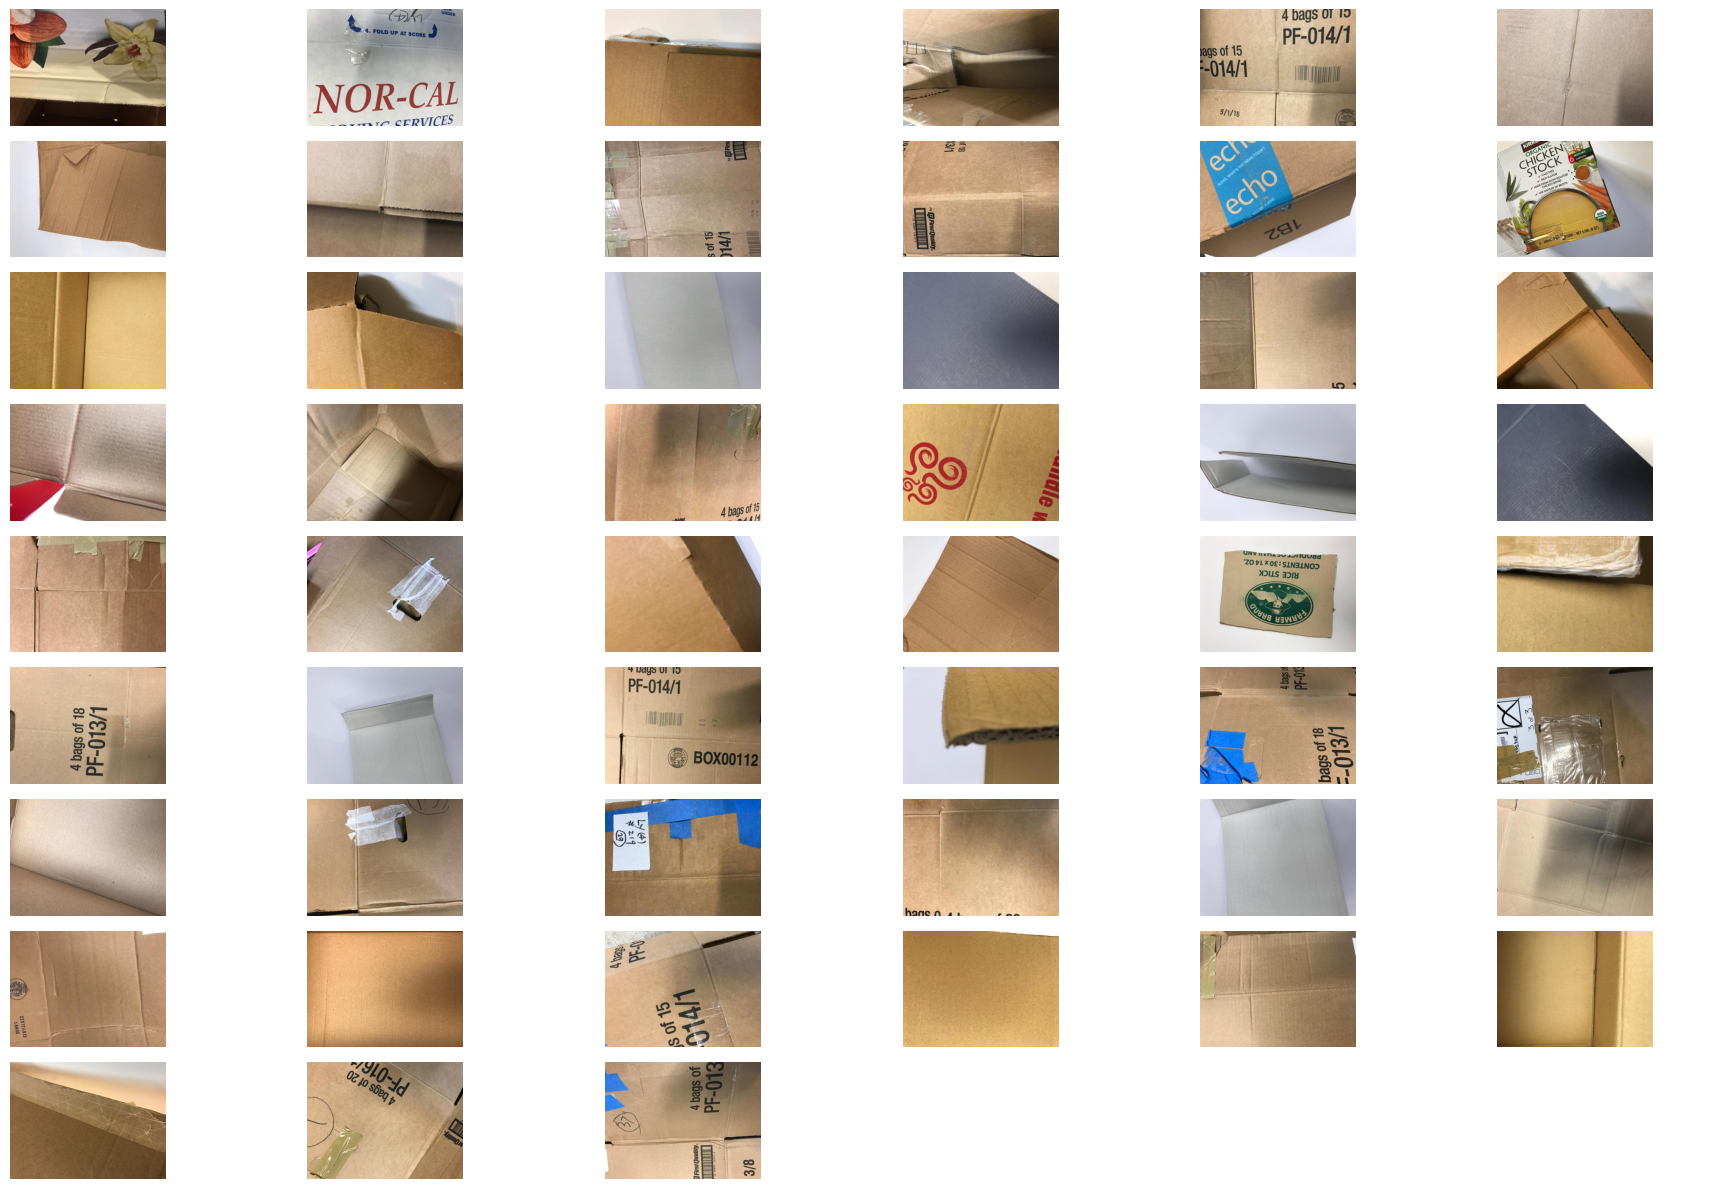

In [66]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

# Folder with example images
image_dir = '/content/Smart-Garbage-Segregation/Data/Test/cardboard'
images = os.listdir(image_dir)

# Layout setup
cols = 6
rows = math.ceil(len(images) / cols)

# Plotting
fig, axs = plt.subplots(rows, cols, figsize=(18, 12))
axs = axs.flatten()

for i, img_name in enumerate(images):
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')

# Hide any empty plots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [54]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PREPARING OF DATA

In [55]:
train = '/content/Smart-Garbage-Segregation/Data/Train'
test = '/content/Smart-Garbage-Segregation/Data/Test'

In [56]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2186 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [57]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [58]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


# Importing oneDNN

# LABELING

In [59]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# CREATING MODEL WITH oneDNN OPTIMIZATION

In [60]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution blocks
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))





/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# COMPILING MODEL  # Enable OneDNN optimizations

In [61]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 75, 75, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     2,803,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,843,910 (10.85 MB)

 Trainable params: 2,843,910 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING THE MODEL(10 EPOCHS)

In [62]:
model.fit(train_generator,
          epochs=1,
          steps_per_epoch=2184//32)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.2026 - loss: 1.8506


# TESTING PREDICTION

In [63]:
import keras.utils as ku
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Probability: 0.5497152
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

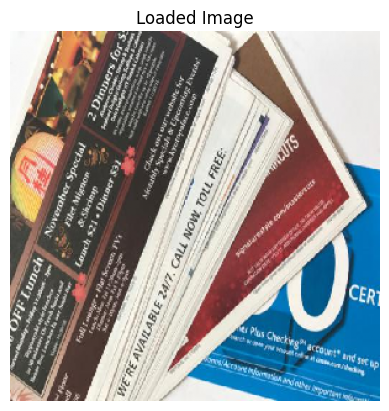

In [ ]:
test_img = '/content/Smart-Garbage-Segregation/Data/Train/paper/paper100.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])


print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")


In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

In [ ]:
test_img = '/content/Smart-Garbage-Segregation/Data/Train/paper/paper100.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

In [ ]:
test_img = '/content/Smart-Garbage-Segregation/Data/Train/metal/metal100.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])


print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

In [ ]:
test_img = '/content/Smart-Garbage-Segregation/Data/Train/glass/glass1.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

# SAVING THE TRAINED MODEL

In [ ]:
model.save('modelnew.h5')

In [65]:
import gradio as gr
import tensorflow.keras.utils as ku
import numpy as np
from tensorflow.keras.models import load_model

# Load your model
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Core classification logic
def classify_image(image):
    img = ku.array_to_img(image).resize((300, 300))
    img_array = ku.img_to_array(img, dtype=np.uint8) / 255.0
    prediction = model.predict(img_array[np.newaxis, ...])[0]

    predicted_class = labels[np.argmax(prediction)]
    confidence = float(np.max(prediction))
    class_confidence = {label: float(prediction[i]) for i, label in enumerate(labels)}

    return predicted_class, f"{confidence * 100:.2f}%", class_confidence

# Fancy Gradio App
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown(
        """
        <div style='text-align: center;'>
            <h1 style='font-size: 2.5em; color: #4A90E2;'>🧠 Trash Classifier</h1>
            <p style='font-size: 1.2em;'>Upload an image of trash, and let our AI sort it into categories!</p>
            <p style='font-size: 1em; color: gray;'>Built with TensorFlow + Gradio</p>
        </div>
        """,
    )

    with gr.Row():
        with gr.Column(scale=1):
            image_input = gr.Image(label="📸 Upload Trash Image", type="numpy", image_mode="RGB")
            submit_button = gr.Button("🚀 Classify", elem_id="submit-button")
        with gr.Column(scale=2):
            result_label = gr.Label(label="🔖 Predicted Class")
            confidence_text = gr.Text(label="📊 Confidence of Top Class")
            confidence_bar = gr.HighlightedText(label="📌 Confidence Breakdown")

    # Logic for updating UI
    def predict_and_format(image):
        predicted_class, confidence, class_confidence = classify_image(image)
        formatted = [(label, f"{conf:.2%}") for label, conf in class_confidence.items()]
        highlighted = [(label, conf, "highlight" if label == predicted_class else None) for label, conf in formatted]
        return predicted_class, confidence, highlighted

    submit_button.click(
        fn=predict_and_format,
        inputs=image_input,
        outputs=[result_label, confidence_text, confidence_bar]
    )

    gr.Markdown(
        """
        <div style='text-align: center; margin-top: 30px;'>
            <p style='font-size: 1em; color: #999;'>🛠 Tip: Use clear images for better classification accuracy</p>
            <p style='font-size: 0.9em; color: #ccc;'>© 2025 Trash Classifier AI</p>
        </div>
        """,
    )

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ab1c873755ccabc072.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

model = tf.keras.models.load_model('/content/Smart-Garbage-Segregation/weights/modelnew.h5')

labels = {
    0: 'cardboard',
    1: 'glass',
    2: 'metal',
    3: 'paper',
    4: 'plastic',
    5: 'trash'
}

def predict_image(img):
    img = img.resize((300, 300))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_class = labels[np.argmax(prediction)]
    confidence = round(100 * np.max(prediction), 2)

    return {labels[i]: float(prediction[i]) for i in range(len(labels))}

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload Trash Image"),
    outputs=gr.Label(num_top_classes=3, label="Predicted Class (Top 3)"),
    title="Smart Garbage Classifier",
    description="Upload an image of trash (cardboard, plastic, glass, paper, metal, trash) to classify it."
)

interface.launch(debug=True)


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image

# Load model
model = tf.keras.models.load_model('/content/Smart-Garbage-Segregation/weights/modelnew.h5')

# Labels
labels = {
    0: 'cardboard',
    1: 'glass',
    2: 'metal',
    3: 'paper',
    4: 'plastic',
    5: 'trash'
}

# Prediction function
def predict_image(img):
    img = img.resize((300, 300))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    return {labels[i]: float(prediction[i]) for i in range(len(labels))}

# Example images (optional)
examples = [
    ["/content/Smart-Garbage-Segregation/Data/Test/cardboard/cardboard353.jpg"],
    ["/content/Smart-Garbage-Segregation/Data/Test/paper/paper522.jpg"],
    ["/content/Smart-Garbage-Segregation/Data/Test/metal/metal386.jpg"],
    ["/content/Smart-Garbage-Segregation/Data/Test/plastic/plastic430.jpg"]
]

# Using gr.Blocks for a better layout
with gr.Blocks(css=".gradio-container {background-color: #f8f9fa; font-family: 'Segoe UI';}") as demo:
    gr.Markdown("<h1 style='text-align: center; color: #2E86C1;'>🗑️ Smart Garbage Classifier</h1>")
    gr.Markdown("<p style='text-align: center;'>Upload or capture a trash image. The AI will predict if it's cardboard, plastic, glass, paper, metal, or trash.</p>")

    with gr.Row():
        with gr.Column():
            input_img = gr.Image(type="pil", label="📸 Upload Image")
            predict_btn = gr.Button("🔍 Classify")
        with gr.Column():
            output_label = gr.Label(num_top_classes=3, label="🧠 Prediction (Top 3 Classes)")

    predict_btn.click(fn=predict_image, inputs=input_img, outputs=output_label)

    gr.Examples(
        examples=examples,
        inputs=input_img,
        outputs=output_label,
        label="🎯 Try with Example Images"
    )

    gr.Markdown("<footer style='text-align: center; color: gray;'>Built with  using TensorFlow + Gradio</footer>")

demo.launch(debug=True)


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image

# Load model
model = tf.keras.models.load_model('/content/Smart-Garbage-Segregation/weights/modelnew.h5')

# Labels
labels = {
    0: 'cardboard',
    1: 'glass',
    2: 'metal',
    3: 'paper',
    4: 'plastic',
    5: 'trash'
}

# Prediction function
def predict_image(img):
    img = img.resize((300, 300))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0]
    return {labels[i]: float(prediction[i]) for i in range(len(labels))}

# Example images
examples = [
    ["/content/Smart-Garbage-Segregation/Data/Test/cardboard/cardboard353.jpg"],
    ["/content/Smart-Garbage-Segregation/Data/Test/paper/paper522.jpg"],
    ["/content/Smart-Garbage-Segregation/Data/Test/metal/metal386.jpg"],
    ["/content/Smart-Garbage-Segregation/Data/Test/plastic/plastic430.jpg"]
]

# CSS for background image
custom_css = """
.gradio-container {
    background: url('https://images.unsplash.com/photo-1581090700227-1e8f58d09057?auto=format&fit=crop&w=1920&q=80') no-repeat center center fixed;
    background-size: cover;
    color: white;
}

footer {
    color: white !important;
}
"""

with gr.Blocks(css=custom_css) as demo:
    gr.Markdown("<h1 style='text-align: center; color: white;'>🗑️ Smart Garbage Classifier</h1>")
    gr.Markdown("<p style='text-align: center;'>Upload or capture a trash image. The AI will predict if it's cardboard, plastic, glass, paper, metal, or trash.</p>")

    with gr.Row():
        with gr.Column():
            input_img = gr.Image(type="pil", label="📸 Upload Image")
            predict_btn = gr.Button("🔍 Classify")
        with gr.Column():
            output_label = gr.Label(num_top_classes=3, label="🧠 Prediction (Top 3 Classes)")

    predict_btn.click(fn=predict_image, inputs=input_img, outputs=output_label)

    gr.Examples(
        examples=examples,
        inputs=input_img,
        outputs=output_label,
        label="🎯 Try with Example Images"
    )

    gr.Markdown("<footer style='text-align: center;'>Built with ❤️ using TensorFlow + Gradio</footer>")

demo.launch(debug=True)


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image

# Load your trained model
model = tf.keras.models.load_model('/content/Smart-Garbage-Segregation/weights/modelnew.h5')

# Define label mapping
labels = {
    0: 'cardboard',
    1: 'glass',
    2: 'metal',
    3: 'paper',
    4: 'plastic',
    5: 'trash'
}

# Prediction function
def predict_image(img):
    img = img.resize((300, 300))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0]
    return {labels[i]: float(prediction[i]) for i in range(len(labels))}

# Example images
examples = [
    ["/content/Smart-Garbage-Segregation/Data/Test/cardboard/cardboard353.jpg"],
    ["/content/Smart-Garbage-Segregation/Data/Test/paper/paper522.jpg"],
    ["/content/Smart-Garbage-Segregation/Data/Test/metal/metal386.jpg"],
    ["/content/Smart-Garbage-Segregation/Data/Test/plastic/plastic430.jpg"]
]

# CSS to add background image (public URL from Unsplash)
custom_css = """
.gradio-container {
    background: url('https://images.unsplash.com/photo-1615663243025-5efd3f04d1d8?auto=format&fit=crop&w=1920&q=80') no-repeat center center fixed;
    background-size: cover;
    color: white;
    font-family: 'Segoe UI', sans-serif;
}

h1, p, label, footer {
    color: white !important;
}
"""

# Create Gradio app with custom CSS
with gr.Blocks(css=custom_css) as demo:
    gr.Markdown("<h1 style='text-align: center;'>🗑️ Smart Garbage Classifier</h1>")
    gr.Markdown("<p style='text-align: center;'>Upload or capture a trash image and get a prediction.</p>")

    with gr.Row():
        with gr.Column():
            input_img = gr.Image(type="pil", label="📸 Upload Image")
            predict_btn = gr.Button("🔍 Classify")
        with gr.Column():
            output_label = gr.Label(num_top_classes=3, label="🧠 Prediction (Top 3 Classes)")

    predict_btn.click(fn=predict_image, inputs=input_img, outputs=output_label)

    gr.Examples(
        examples=examples,
        inputs=input_img,
        outputs=output_label,
        label="🎯 Try with Example Images"
    )

    gr.Markdown("<footer style='text-align: center;'>Built with ❤️ using TensorFlow + Gradio</footer>")

# Launch the app
demo.launch(debug=True)
